El proceso de Data Science en un archivo de Excel con las columnas dadas puede incluir los siguientes pasos:

Importar las bibliotecas necesarias:


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Leer el archivo Excel utilizando la función read_excel de la biblioteca pandas:


In [35]:
df = pd.read_excel('datos.xlsx')
df.head()

,FECHA,ANIO,MES,CODIGO CLIENTE,CANAL,COD_ITEM,NOMBRE_PRODUCTO,NOMBRE_CATEGORIA,NOMBRE_TIPO_NEGOCIO,COD_LOCAL,NOMBRE_LOCAL,NOMBRE_PROVINCIA,NOMBRE_CIUDAD,NÚMERO DE TRANSACCIÓN,VENTA_NETA,MARGEN,CANTIDAD,COD FORMA DE PAGO
0,2021-10-08,2021,10,7767359,PDV,50785,CEPILLOS B&C,IMPLEMENTOS DE CABELLO B&C,B&C,791,FYBECA MALL DE LOS ANDES,TUNGURAHUA,AMBATO,3810852,7,2,1,1
1,2022-01-21,2022,1,8522244,PDV,30253,DELINEADOR OJOS ESSENCE,COSMETICO UÑAS,B&CP,95,FYBECA LOS MANGOS,MANABÍ,PORTOVIEJO,5962659,9,2,1,1
2,2021-12-30,2021,12,7482712,PDV,103961,HANUTA B&C,COLACIONES Y SNACKS,B&C,1271,FYBECA SAN LUIS SHOPPING,PICHINCHA,QUITO,3485885,11,2,2,3
3,2022-09-15,2022,9,6005545,PDV,92243,PAPAS PRINGLES B&C.,CONFITES,B&C,71840,FYBECA LOS FRESNOS,PICHINCHA,QUITO,4209849,18,2,1,5
4,2022-07-20,2022,7,6627039,PDV,5757,VITAMIN CHOICE ANTIOXIDANTE,SUPLEMENTOS,B&C,1901,FYBECA SCALA,PICHINCHA,QUITO,6412586,7,2,1,5


Realizar la limpieza de datos:

Eliminar las filas o columnas que no sean necesarias para el análisis utilizando la función drop de pandas:

In [36]:
df = df.drop(columns=['CODIGO CLIENTE', 'NOMBRE_LOCAL'])
df.head()

,FECHA,ANIO,MES,CANAL,COD_ITEM,NOMBRE_PRODUCTO,NOMBRE_CATEGORIA,NOMBRE_TIPO_NEGOCIO,COD_LOCAL,NOMBRE_PROVINCIA,NOMBRE_CIUDAD,NÚMERO DE TRANSACCIÓN,VENTA_NETA,MARGEN,CANTIDAD,COD FORMA DE PAGO
0,2021-10-08,2021,10,PDV,50785,CEPILLOS B&C,IMPLEMENTOS DE CABELLO B&C,B&C,791,TUNGURAHUA,AMBATO,3810852,7,2,1,1
1,2022-01-21,2022,1,PDV,30253,DELINEADOR OJOS ESSENCE,COSMETICO UÑAS,B&CP,95,MANABÍ,PORTOVIEJO,5962659,9,2,1,1
2,2021-12-30,2021,12,PDV,103961,HANUTA B&C,COLACIONES Y SNACKS,B&C,1271,PICHINCHA,QUITO,3485885,11,2,2,3
3,2022-09-15,2022,9,PDV,92243,PAPAS PRINGLES B&C.,CONFITES,B&C,71840,PICHINCHA,QUITO,4209849,18,2,1,5
4,2022-07-20,2022,7,PDV,5757,VITAMIN CHOICE ANTIOXIDANTE,SUPLEMENTOS,B&C,1901,PICHINCHA,QUITO,6412586,7,2,1,5


Identificar y tratar los valores faltantes utilizando la función isna y fillna de pandas:

In [37]:
print(df.isna().sum)

df = df.fillna({'ANIO':df['FECHA'].dt.year,
                'MES':df['FECHA'].dt.month})

<bound method NDFrame._add_numeric_operations.<locals>.sum of        FECHA   ANIO    MES  CANAL  COD_ITEM  NOMBRE_PRODUCTO  \
0      False  False  False  False     False            False   
1      False  False  False  False     False            False   
2      False  False  False  False     False            False   
3      False  False  False  False     False            False   
4      False  False  False  False     False            False   
...      ...    ...    ...    ...       ...              ...   
49994  False  False  False  False     False            False   
49995  False  False  False  False     False            False   
49996  False  False  False  False     False            False   
49997  False  False  False  False     False            False   
49998  False  False  False  False     False            False   

       NOMBRE_CATEGORIA  NOMBRE_TIPO_NEGOCIO  COD_LOCAL  NOMBRE_PROVINCIA  \
0                 False                False      False             False   
1              

Identificar y tratar los valores atípicos utilizando la función describe y boxplot de pandas:

               ANIO           MES       COD_ITEM     COD_LOCAL  \
count  49999.000000  49999.000000   49999.000000  49999.000000   
mean    2021.764515      6.156883   55163.883998  20857.399348   
std        0.669213      3.654242   30909.642242  32103.436424   
min     2021.000000      1.000000    1462.000000      1.000000   
25%     2021.000000      3.000000   28319.000000     60.000000   
50%     2022.000000      6.000000   55556.000000   1461.000000   
75%     2022.000000      9.000000   81816.000000  71862.000000   
max     2023.000000     12.000000  108895.000000  72439.000000   

       NÚMERO DE TRANSACCIÓN   VENTA_NETA       MARGEN      CANTIDAD  \
count           4.999900e+04  49999.00000  49999.00000  49999.000000   
mean            4.422352e+06     12.49649      2.48743      5.706914   
std             2.382911e+06      4.63621      1.11048     13.490485   
min             2.655160e+05      5.00000      1.00000   -120.000000   
25%             2.368620e+06      8.00000    

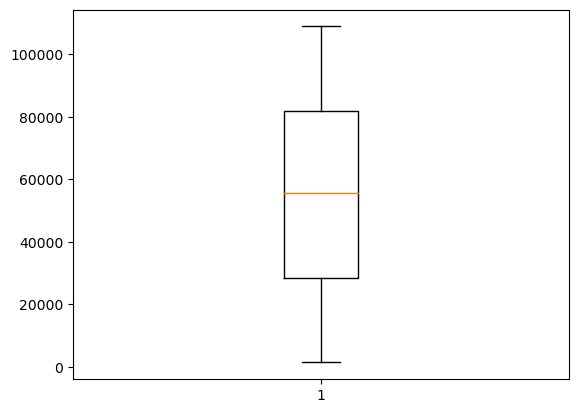

In [38]:
print(df.describe())

plt.boxplot(df['COD_ITEM'])
plt.show()

Realizar el análisis exploratorio de datos:

Identificar las relaciones entre las variables utilizando la función corr de pandas:

In [39]:
print(df.corr())

                           ANIO       MES  COD_ITEM  COD_LOCAL  \
ANIO                   1.000000 -0.304493 -0.025671   0.144881   
MES                   -0.304493  1.000000  0.012315   0.025557   
COD_ITEM              -0.025671  0.012315  1.000000   0.009811   
COD_LOCAL              0.144881  0.025557  0.009811   1.000000   
NÚMERO DE TRANSACCIÓN -0.007724  0.005159 -0.000981  -0.002393   
VENTA_NETA             0.015927 -0.019110 -0.011695   0.003866   
MARGEN                 0.016094 -0.010180 -0.030202   0.017664   
CANTIDAD              -0.032972 -0.011556  0.026849  -0.016900   
COD FORMA DE PAGO      0.009315 -0.026926  0.004345   0.010489   

                       NÚMERO DE TRANSACCIÓN  VENTA_NETA    MARGEN  CANTIDAD  \
ANIO                               -0.007724    0.015927  0.016094 -0.032972   
MES                                 0.005159   -0.019110 -0.010180 -0.011556   
COD_ITEM                           -0.000981   -0.011695 -0.030202  0.026849   
COD_LOCAL          

C:\Users\Statick\AppData\Local\Temp\ipykernel_9520\4212406737.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


Visualizar los datos utilizando gráficos como histogramas, gráficos de barras y diagramas de dispersión:

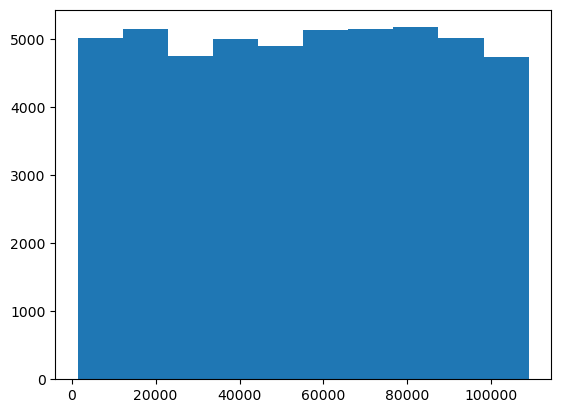

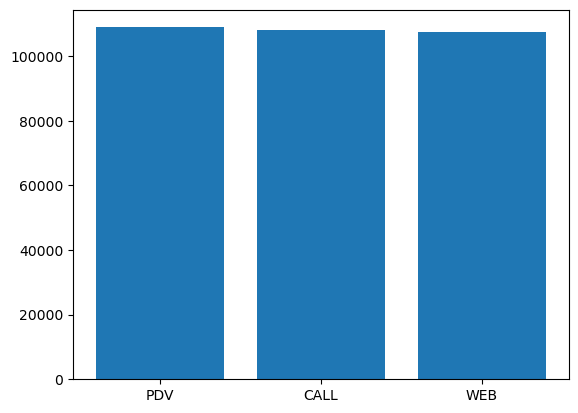

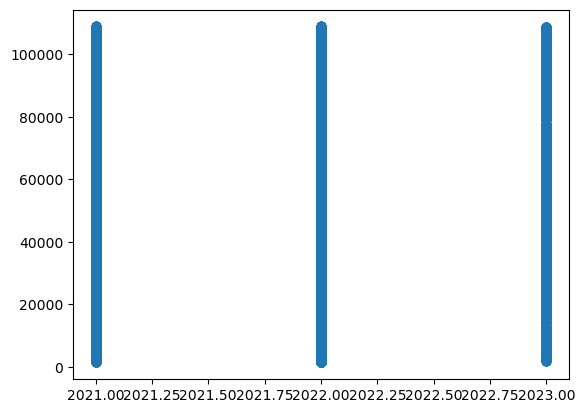

In [40]:
plt.hist(df['COD_ITEM'])
plt.show()

plt.bar(df['CANAL'], df['COD_ITEM'])
plt.show()

plt.scatter(df['ANIO'], df['COD_ITEM'])
plt.show()

Realizar el modelado y la predicción:

Dividir los datos en conjuntos de entrenamiento y prueba utilizando la función train_test_split de la biblioteca sklearn:

In [41]:
from sklearn.model_selection import train_test_split

X = df[['ANIO', 'MES']]
y = df['COD_ITEM']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Crear el modelo y ajustarlo a los datos utilizando la función fit de la biblioteca sklearn:

In [42]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Realizar la predicción utilizando la función predict de la biblioteca sklearn:

In [43]:
y_pred = regressor.predict(X_test)

Exportar los datos a un nuevo archivo Excel utilizando la función to_excel de pandas:

In [44]:
df.to_excel('datos_procesados.xlsx', index=False)

El código completo quedaría así:



FECHA                    0
ANIO                     0
MES                      0
CANAL                    0
COD_ITEM                 0
NOMBRE_PRODUCTO          0
NOMBRE_CATEGORIA         0
NOMBRE_TIPO_NEGOCIO      0
COD_LOCAL                0
NOMBRE_PROVINCIA         0
NOMBRE_CIUDAD            0
NÚMERO DE TRANSACCIÓN    0
VENTA_NETA               0
MARGEN                   0
CANTIDAD                 0
COD FORMA DE PAGO        0
dtype: int64
               ANIO           MES       COD_ITEM     COD_LOCAL  \
count  49999.000000  49999.000000   49999.000000  49999.000000   
mean    2021.764515      6.156883   55163.883998  20857.399348   
std        0.669213      3.654242   30909.642242  32103.436424   
min     2021.000000      1.000000    1462.000000      1.000000   
25%     2021.000000      3.000000   28319.000000     60.000000   
50%     2022.000000      6.000000   55556.000000   1461.000000   
75%     2022.000000      9.000000   81816.000000  71862.000000   
max     2023.000000     12.

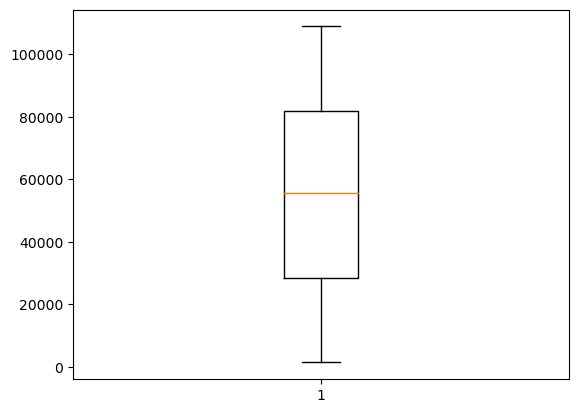

                           ANIO       MES  COD_ITEM  COD_LOCAL  \
ANIO                   1.000000 -0.304493 -0.025671   0.144881   
MES                   -0.304493  1.000000  0.012315   0.025557   
COD_ITEM              -0.025671  0.012315  1.000000   0.009811   
COD_LOCAL              0.144881  0.025557  0.009811   1.000000   
NÚMERO DE TRANSACCIÓN -0.007724  0.005159 -0.000981  -0.002393   
VENTA_NETA             0.015927 -0.019110 -0.011695   0.003866   
MARGEN                 0.016094 -0.010180 -0.030202   0.017664   
CANTIDAD              -0.032972 -0.011556  0.026849  -0.016900   
COD FORMA DE PAGO      0.009315 -0.026926  0.004345   0.010489   

                       NÚMERO DE TRANSACCIÓN  VENTA_NETA    MARGEN  CANTIDAD  \
ANIO                               -0.007724    0.015927  0.016094 -0.032972   
MES                                 0.005159   -0.019110 -0.010180 -0.011556   
COD_ITEM                           -0.000981   -0.011695 -0.030202  0.026849   
COD_LOCAL          

C:\Users\Statick\AppData\Local\Temp\ipykernel_9520\3407156804.py:25: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


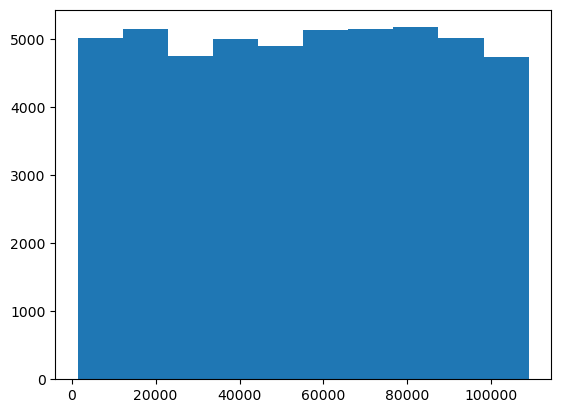

<function matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)>

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Paso 1: Importar las bibliotecas necesarias
# Paso 2: Leer el archivo Excel
df = pd.read_excel('datos.xlsx')

# Paso 3: Realizar la limpieza de datos
df = df.drop(columns=['CODIGO CLIENTE', 'NOMBRE_LOCAL'])

print(df.isna().sum())

df = df.fillna({'ANIO': df['FECHA'].dt.year,
                'MES': df['FECHA'].dt.month})

print(df.describe())

plt.boxplot(df['COD_ITEM'])
plt.show()

# Paso 4: Realizar el análisis exploratorio de datos
print(df.corr())

plt.hist(df['COD_ITEM'])
plt.show()

plt.bar